**Bank Customer Churn Model**

**Objective** The main objective of this problem statement is to analyze the customer churn rate for bank that will help the bank to know about why customers are leaving the bank

**Data Source:** The dataset is collected from kaggle platform
Link for dataset: https://www.kaggle.com/code/kdsharma/banking-churn-analysis-modeling/input

**Import Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Dataset**

In [14]:
df=pd.read_excel('Churn_data.xlsx')

In [15]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0


**Describing Data**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      4086 non-null   int64  
 1   Gender           4086 non-null   int64  
 2   Age              4086 non-null   int64  
 3   Tenure           4086 non-null   int64  
 4   Balance          4086 non-null   float64
 5   NumOfProducts    4086 non-null   int64  
 6   HasCrCard        4086 non-null   int64  
 7   IsActiveMember   4086 non-null   int64  
 8   EstimatedSalary  4086 non-null   float64
 9   Exited           4086 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 319.3 KB


In [17]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,650.123348,0.462800,38.922907,5.067058,77627.500837,1.521537,0.708762,0.511013,100300.611309,0.211209
std,97.564980,0.498675,10.589488,2.861367,62264.846516,0.578608,0.454389,0.499940,57709.247483,0.408216
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51009.127500,0.000000
50%,653.000000,0.000000,37.000000,5.000000,98086.880000,1.000000,1.000000,1.000000,100369.300000,0.000000
75%,717.000000,1.000000,44.000000,8.000000,128215.660000,2.000000,1.000000,1.000000,148946.192500,0.000000
max,850.000000,1.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [18]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.shape

(4086, 10)

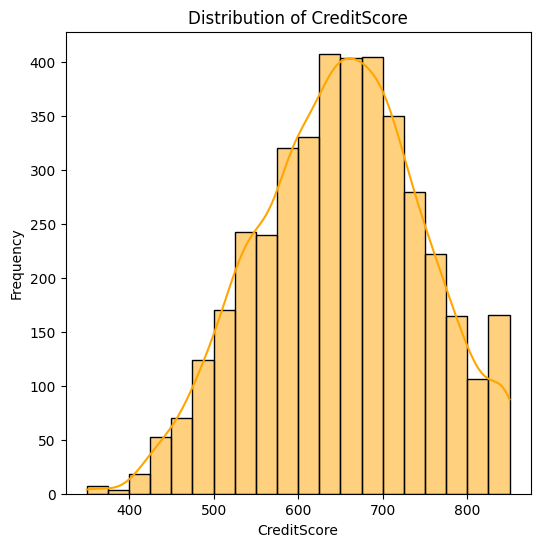

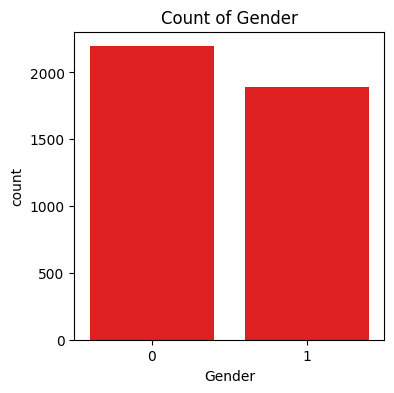

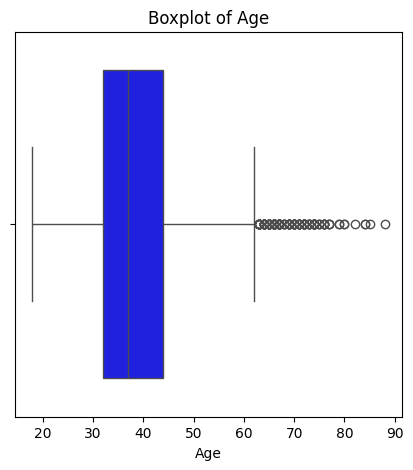

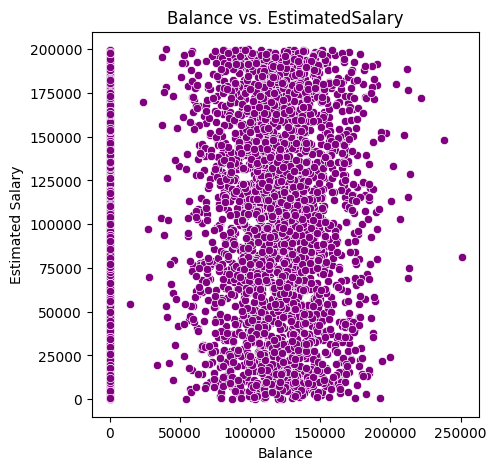

In [20]:
# Visualization 1: Histograms of credit score
plt.figure(figsize=(6, 6))
sns.histplot(df['CreditScore'], bins=20, kde=True,color='orange')
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()
# Visualization 2: Count plot of Gender
plt.figure(figsize=(4, 4))
sns.countplot(x='Gender', data=df,color='Red')
plt.title('Count of Gender')
plt.show()

# Visualization 3: Boxplot of Age
plt.figure(figsize=(5,5))
sns.boxplot(x='Age', data=df,color='Blue')
plt.title('Boxplot of Age')
plt.show()

# Visualization 4: Scatter plot of Balance vs. EstimatedSalary
plt.figure(figsize=(5,5))
sns.scatterplot(x='Balance', y='EstimatedSalary', data=df,color='purple')
plt.title('Balance vs. EstimatedSalary')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.show()

**Data Preprocessing**

In [21]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df.dropna()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
4081,721,0,33,5,0.00,2,0,1,117626.90,0
4082,778,1,29,6,150358.97,1,1,0,62454.01,1
4083,850,1,45,4,114347.85,2,1,1,109089.04,0
4084,693,1,39,4,0.00,2,0,1,142331.39,0


In [23]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [24]:
df['Churned'].replace({0:'No',1:'Yes'},inplace=True)

In [25]:
!pip install imbalanced-learn


**Define Target Variable (y) and Feature Variables (X)**

In [26]:

from sklearn.model_selection import train_test_split
x=df.drop(columns=['Churned'])
y=df['Churned']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Modeling**




Random Forest Algorithm

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Model Evaluation

In [28]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Prediction

In [30]:
y_pred=clf.predict(x_test)

In [31]:
acc=accuracy_score(y_test,y_pred)
acc

0.8482871125611745

Accuracy Score

In [32]:
y_train_pred = clf.predict(x_train)
y_test_pred  = clf.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 84.83 %


In [33]:
new=[[608,1,	41,1.0,	83807.86	,1.0,	0.0,	1.0,	112542.58	]]
new_data=clf.predict(new)
print(new_data)

['No']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Decision Tree**

In [34]:
model=DecisionTreeClassifier()

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pr=model.predict(x_test)

In [37]:
ac=accuracy_score(y_test,y_pr)
ac

0.7699836867862969

In [38]:
y_train_dec = model.predict(x_train)
y_test_dec  = model.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_dec)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_dec)*100,2),"%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 77.0 %


**SVM**

In [39]:
from sklearn import svm
classifier= svm.SVC()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
train=classifier.predict(x_train)
test=classifier.predict(x_test)
print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,train)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,test)*100,2),"%")

Accuracy Score of Model on Training Data is => 79.23 %
Accuracy Score of Model on Testing Data  is => 78.06 %
